In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

In [2]:
df = pd.read_csv(r'E:\Code_Vauld\IOT_GEN_PLOT2\1m8c8s8L_AutoMan_Anomaly\sensor_IOT_2.csv')
df.tail(5)

TS        xs1        xs2         xs3        xs4  \
6786  03/11/2022 02:12:21 PM  20.646673  60.595141  669.088290  92.799654   
6787  03/11/2022 02:12:22 PM  20.827228  66.530038  610.810208  91.463016   
6788  03/11/2022 02:12:23 PM  20.907723  62.439792  611.089013  92.783100   
6789  03/11/2022 02:12:24 PM  22.322878  61.270226  607.572160  91.063364   
6790  03/11/2022 02:12:25 PM  26.593615  60.883573  614.304469  93.421985   

             xs5         xs6         xs7        xs8  label  
6786  111.324267  336.702352  613.774809  91.882612      3  
6787  111.275100  347.527346  613.520770  92.463427      2  
6788  111.421581  350.276469  615.930634  91.956638      0  
6789  111.258126  339.267300  615.306716  90.568762      0  
6790  111.309720  332.661284  603.719522  92.872003      1

In [3]:
df  = df.drop(['TS'], axis=1)

In [4]:
df.dtypes

xs1      float64
xs2      float64
xs3      float64
xs4      float64
xs5      float64
xs6      float64
xs7      float64
xs8      float64
label      int64
dtype: object

In [5]:
df.shape

(6791, 9)

In [6]:
df.describe().transpose()

count        mean        std         min         25%         50%  \
xs1    6791.0   21.948156   1.477826   20.550162   21.083719   21.649190   
xs2    6791.0   61.901554   1.390847   60.550138   61.096423   61.626261   
xs3    6791.0  613.457411  12.227013  600.554729  606.049845  611.417164   
xs4    6791.0   92.381991   1.523822   90.550669   91.366379   92.159790   
xs5    6791.0  111.327639   1.176997  110.550097  110.815847  111.074290   
xs6    6791.0  341.845318   7.944622  330.550450  335.962863  341.071769   
xs7    6791.0  612.479548  10.936895  600.550275  605.772968  610.877617   
xs8    6791.0   92.365330   1.746000   90.551820   91.334785   92.099833   
label  6791.0    1.993815   2.566630    0.000000    0.000000    0.000000   

              75%         max  
xs1     22.196843   28.992140  
xs2     62.170007   69.000549  
xs3    616.637864  679.930096  
xs4     92.944105  100.052371  
xs5    111.342363  117.988638  
xs6    346.459287  378.713341  
xs7    616.260219  679.788751  
xs8     92.875664  101.959755  
label    4.000000    8.000000

In [7]:
df.skew().sort_values(ascending=False)

xs5      3.685838
xs8      2.944592
xs7      2.811619
xs2      2.654186
xs3      2.614998
xs1      2.542950
xs4      2.101595
xs6      1.364133
label    1.012329
dtype: float64

In [8]:
df.kurt().sort_values(ascending=False)

xs5      13.448586
xs7      10.427853
xs8      10.400956
xs3       8.020196
xs2       7.549788
xs1       6.629705
xs4       5.635838
xs6       3.231585
label    -0.339521
dtype: float64

In [9]:
df.columns

Index(['xs1', 'xs2', 'xs3', 'xs4', 'xs5', 'xs6', 'xs7', 'xs8', 'label'], dtype='object')

for i in ['xs1', 'xs2', 'xs3', 'xs4', 'xs5', 'xs6', 'xs7', 'xs8', 'label']:
    sns.displot(df[i], kde=True , rug=True)
    plt.show()
# No need to do log transform here as we dont need gaussian assumption for Decision Trees

for i in ['xs1', 'xs2', 'xs3', 'xs4', 'xs5', 'xs6', 'xs7', 'xs8']:
    sns.boxplot(x='label',y=i,data=df)
    plt.show()

sns.jointplot(x='xs3',y='xs7',data=df,kind='reg')
# Discussed collinearity - it doesnt impact Decision tree model but be cautious while interpretation of the model

<AxesSubplot:xlabel='label', ylabel='count'>

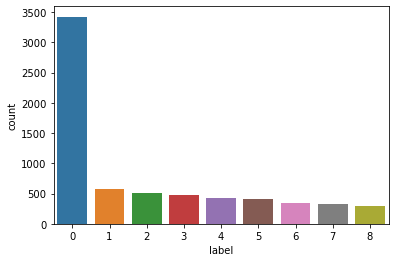

In [10]:
sns.countplot(x="label", data=df)

In [11]:
df.label.value_counts()

0    3423
1     577
2     512
3     471
4     425
5     404
6     348
7     330
8     301
Name: label, dtype: int64

# Handling Imbalance Data with IMBLEARN

In [12]:
X = df.drop('label',axis = 1)
Y = df['label']

In [13]:
print(X.shape,Y.shape)

(6791, 8) (6791,)


In [14]:
#pip install imblearn
# Install via for Anaconda Prompt run as Admin
# conda install -c conda-forge imbalanced-learn

from imblearn.under_sampling import NearMiss

nm = NearMiss()

In [15]:
#from imblearn.under_sampling import RandomUnderSampler

#nm = RandomUnderSampler(random_state=42)

X_res,y_res=nm.fit_sample(X,Y)
X_res.shape,y_res.shape

from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

In [16]:
X_res,y_res=X,Y

In [17]:
X_res.tail()

xs1        xs2         xs3        xs4         xs5         xs6  \
6786  20.646673  60.595141  669.088290  92.799654  111.324267  336.702352   
6787  20.827228  66.530038  610.810208  91.463016  111.275100  347.527346   
6788  20.907723  62.439792  611.089013  92.783100  111.421581  350.276469   
6789  22.322878  61.270226  607.572160  91.063364  111.258126  339.267300   
6790  26.593615  60.883573  614.304469  93.421985  111.309720  332.661284   

             xs7        xs8  
6786  613.774809  91.882612  
6787  613.520770  92.463427  
6788  615.930634  91.956638  
6789  615.306716  90.568762  
6790  603.719522  92.872003

In [18]:
y_res.tail()

6786    3
6787    2
6788    0
6789    0
6790    1
Name: label, dtype: int64

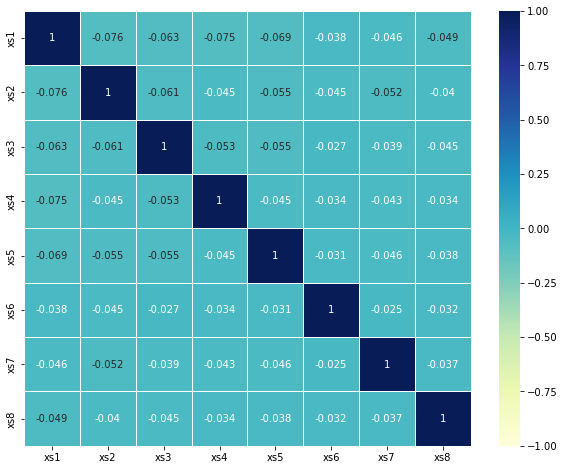

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(X_res.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=True,
            cmap="YlGnBu",
            vmin=-1,
            vmax=+1)
plt.show()

In [20]:
X_res.columns

Index(['xs1', 'xs2', 'xs3', 'xs4', 'xs5', 'xs6', 'xs7', 'xs8'], dtype='object')

In [21]:
df3 = X_res.join(y_res)

In [22]:
df3.tail()

xs1        xs2         xs3        xs4         xs5         xs6  \
6786  20.646673  60.595141  669.088290  92.799654  111.324267  336.702352   
6787  20.827228  66.530038  610.810208  91.463016  111.275100  347.527346   
6788  20.907723  62.439792  611.089013  92.783100  111.421581  350.276469   
6789  22.322878  61.270226  607.572160  91.063364  111.258126  339.267300   
6790  26.593615  60.883573  614.304469  93.421985  111.309720  332.661284   

             xs7        xs8  label  
6786  613.774809  91.882612      3  
6787  613.520770  92.463427      2  
6788  615.930634  91.956638      0  
6789  615.306716  90.568762      0  
6790  603.719522  92.872003      1

In [23]:
df3 = df3.sample(frac = 1).reset_index(drop=True)

In [24]:
df3.tail()

xs1        xs2         xs3        xs4         xs5         xs6  \
6786  27.109808  62.136982  601.875686  90.838004  111.477306  345.388036   
6787  21.321629  61.028532  601.944961  93.109786  110.983590  332.451285   
6788  22.298076  61.288177  614.144953  92.832744  110.606899  350.303541   
6789  21.402748  62.246194  615.174245  93.469565  110.947250  331.201425   
6790  21.578631  61.408340  616.705073  90.814924  114.622482  338.684439   

             xs7        xs8  label  
6786  601.996453  93.117189      1  
6787  601.001534  92.474111      0  
6788  659.031434  91.095671      7  
6789  609.170961  92.615710      0  
6790  615.636184  93.130524      5

In [25]:
df3.to_csv(r'C:\Users\Ganga Babu.M\Anomaly_Classifier_Model\shuffled.csv')

# Use pair plots on only variables with interesting correlations only
sns.pairplot(df3,hue='label',diag_kind ='kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4,vars = ['xs1', 'xs2', 'xs3', 'xs4', 'xs5', 'xs6', 'xs7', 'xs8'])
plt.show()

# Another way of visualizing pair plots for reference
grid = sns.PairGrid(data= df3,
                    vars = ['xs1', 'xs2', 'xs3', 'xs4', 'xs5', 'xs6', 'xs7', 'xs8'], height = 4)
grid = grid.map_upper(sns.scatterplot)
grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred', edgecolor = 'k')
grid = grid.map_lower(sns.kdeplot)

In [26]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(df3.drop(['label'],axis=1), df3['label'], test_size=.3,
                                                   random_state=22)
X_train.shape,X_test.shape

((4753, 8), (2038, 8))

# Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.

In [27]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 3 and size of the leaf node to 5 (no particular reason for 
# selecting this)
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [28]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Print the accuracy of the model & print the confusion matrix

In [29]:
model_entropy.score(X_train, y_train)  
# performance on train data
# If allow data set go to leaves then accuracy always go to 1, if change min leaf nodes then also behave similar to pruning;

1.0

In [30]:
acc = model_entropy.score(X_test, y_test) 
# performance on test data
acc

0.9995093228655545

Ref if required: Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.

https://github.com/GreatLearningAIML1/chennai-oct-19-GangababuGB/blob/master/EnsembleTechnique/Session10_CaseStudyEnsemble_Sahil.ipynb

There is a high degree of overfitting in the model due to which the test accuracy drops drastically. This shows why decision trees are prone to overfitting.

Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy


In [31]:
#Model has been overfitted and perfomring well on test data, try standardization.

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [33]:
model_entropy.score(X_train, y_train)

1.0

In [34]:
acc = model_entropy.score(X_test, y_test) 
# performance on test data
acc

0.9995093228655545

In [35]:
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=7, min_samples_leaf=6)
clf_pruned.fit(X_train, y_train)
# Regularize or prune, max step to 3, min smaples leaf -> less than 5 data pts not split;

DecisionTreeClassifier(max_depth=7, min_samples_leaf=6, random_state=100)

In [36]:
clf_pruned.score(X_train, y_train)

0.9520302966547444

In [37]:
clf_pruned.score(X_test, y_test) 

0.9602551521099116

# Visualizing the tree

You might need to install pydotplus and graphviz packages for visualising the tree.

In [38]:
#pip install six

In [39]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

In [40]:
xvar = df3.drop(['label'], axis=1)
feature_cols = xvar.columns
feature_cols

Index(['xs1', 'xs2', 'xs3', 'xs4', 'xs5', 'xs6', 'xs7', 'xs8'], dtype='object')

In [41]:
y_test.value_counts()

0    1019
1     166
3     159
2     143
4     134
6     122
5     119
7      98
8      78
Name: label, dtype: int64

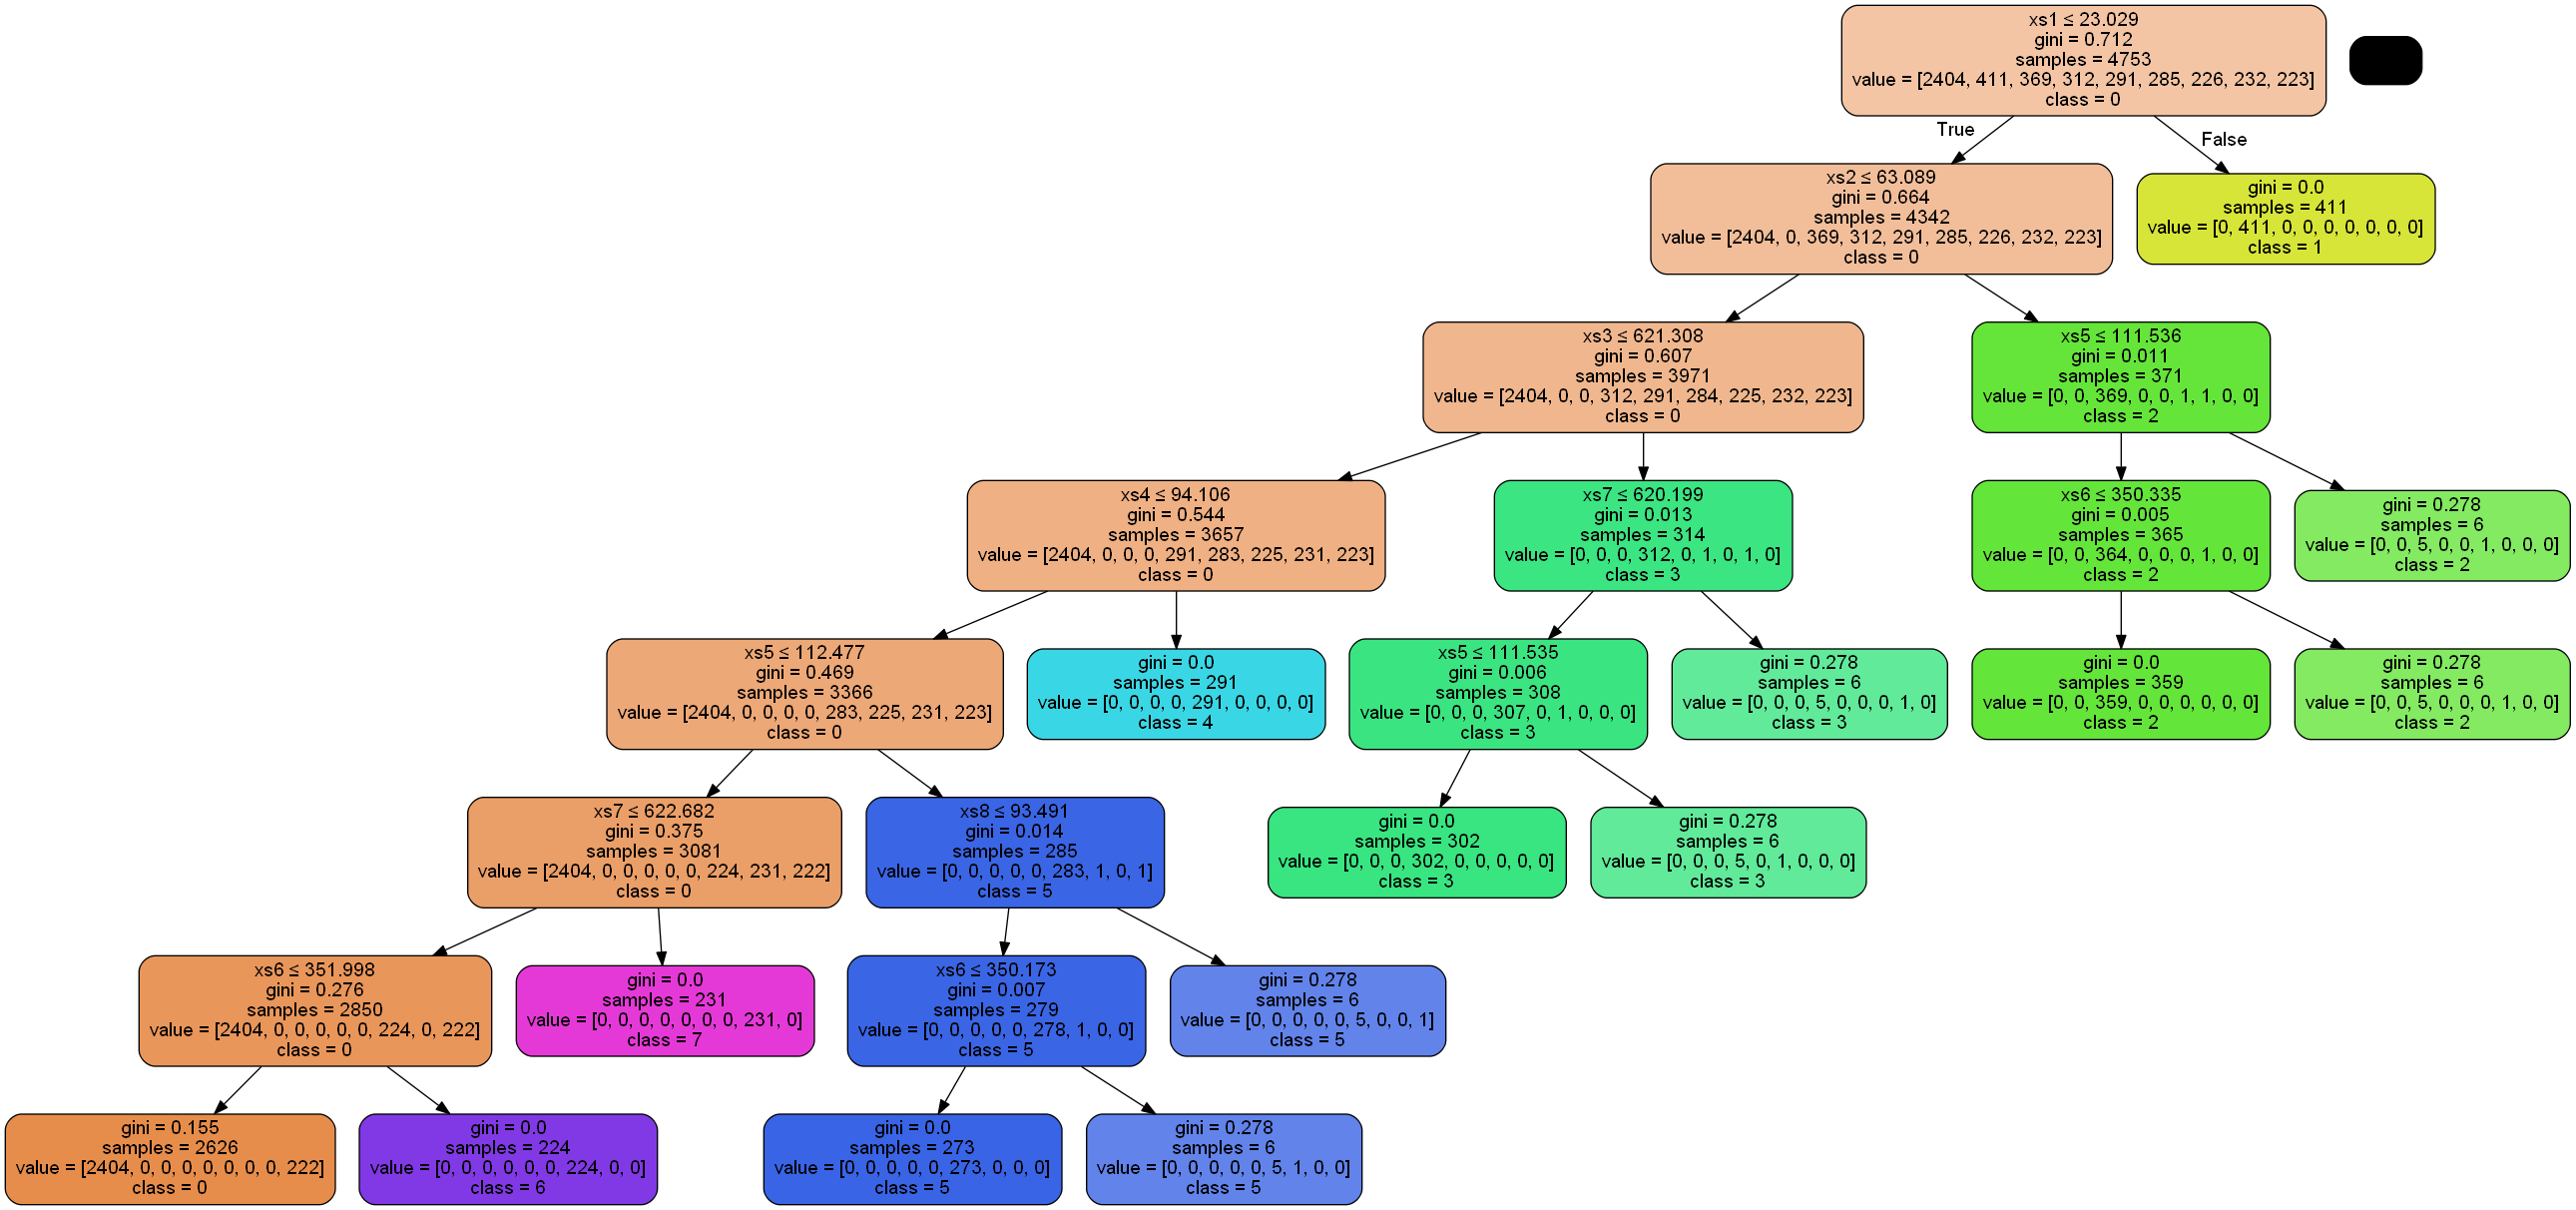

In [42]:
#Print the pruned tree
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4','5','6','7','8'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Anomaly_pruned.png')
Image(graph.create_png())

In [43]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [44]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))
# Pruning helped as test / training but perhaps getting to more underfitting now - cautious about it.

0.9602551521099116
0.9520302966547444


In [45]:
acc_DT = accuracy_score(y_test, preds_pruned)
acc_DT

0.9602551521099116

In [46]:
#Grid Search - To find the best parameters for Pruned Decision Tree
#X_train, X_test, y_train, y_test
# criterion = "gini", random_state = 100, max_depth=7, min_samples_leaf=6
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(random_state = 100)
grid_values = {'criterion' : ['gini', 'entropy'],
               'splitter' : ['best', 'random'],
               'max_depth' : np.arange(5,8),
               'min_samples_leaf' : np.arange(4,7)
              }
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)
# New Model Evaluation metrics 
print('Evaluation Score : ' + str(grid_clf_acc.score(X_test,y_test)))
print('Best Parameters : ' + str(grid_clf_acc.best_params_))

acc_GS = grid_clf_acc.score(X_test,y_test)

Evaluation Score : 0.9602551521099116
Best Parameters : {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 4, 'splitter': 'best'}


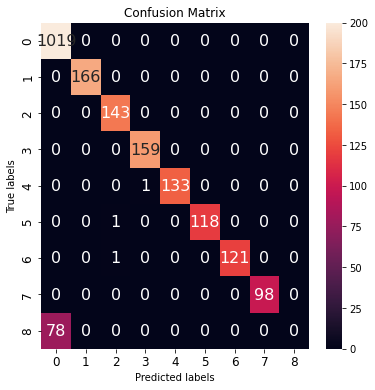

In [47]:
#Decision Tree (Grid Search) Confusion matrix
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (6,6))
sns.heatmap(confusion_matrix(y_test,y_pred_acc),annot=True,vmin=0,vmax=200,fmt='g', ax = ax,annot_kws={"size": 16})
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12); 
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12);

In [48]:
y_test.value_counts()

0    1019
1     166
3     159
2     143
4     134
6     122
5     119
7      98
8      78
Name: label, dtype: int64

In [49]:
# Another way to look at the precision - recall scores
y,levels = pd.factorize(df3['label'].astype(str))
print(metrics.classification_report(y_test,y_pred_acc,target_names=levels))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1019
           7       1.00      1.00      1.00       166
           3       0.99      1.00      0.99       143
           6       0.99      1.00      1.00       159
           8       1.00      0.99      1.00       134
           4       1.00      0.99      1.00       119
           2       1.00      0.99      1.00       122
           1       1.00      1.00      1.00        98
           5       0.00      0.00      0.00        78

    accuracy                           0.96      2038
   macro avg       0.88      0.89      0.88      2038
weighted avg       0.92      0.96      0.94      2038



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
## Calculating feature importance used for interpretation
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

0
xs1  0.168969
xs2  0.157905
xs5  0.141698
xs3  0.140505
xs4  0.138114
xs6  0.128514
xs7  0.124188
xs8  0.000108

In [51]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree','Pruned Decision Tree','Grid Search Decision Tree'], 'accuracy': [acc,acc_DT,acc_GS]})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0              Decision Tree  0.999509
1       Pruned Decision Tree  0.960255
2  Grid Search Decision Tree  0.960255

In [52]:
# You can run the model on the new data coming in every day
test = df3.sample(n = 10,replace=True,random_state=100).drop(['label'],axis=1)
test.reset_index(inplace=True,drop=True)

In [53]:
test

xs1        xs2         xs3        xs4         xs5         xs6  \
0  20.832906  61.149631  603.602397  93.384719  111.068181  347.839795   
1  26.277291  61.921694  611.003002  91.658751  110.611285  342.804445   
2  26.698361  62.270364  616.618811  91.476661  110.794303  335.156766   
3  26.932283  61.310722  619.996650  93.522716  111.489373  341.187003   
4  21.415649  61.181501  609.326262  93.212170  111.518380  348.694445   
5  21.760537  62.277007  602.987310  91.860213  110.599612  345.605568   
6  21.763358  61.461299  608.699470  92.744728  110.679822  332.267666   
7  21.482239  62.497143  601.935857  92.365444  110.997049  349.892737   
8  21.682657  61.124941  612.527959  92.219188  111.267921  347.046184   
9  21.490246  61.885992  645.298901  93.170499  110.980898  338.325573   

          xs7        xs8  
0  603.007120  92.993576  
1  601.701362  93.048362  
2  614.353769  92.179650  
3  617.186491  91.773084  
4  606.804670  91.978809  
5  660.774758  90.942236  
6  610.675012  93.102315  
7  614.211889  91.310392  
8  614.321067  92.110485  
9  617.009195  92.039369

In [54]:
# Make predictions based on your final mode 
predictions = grid_clf_acc.predict(test)
pd.DataFrame(predictions)

0
0  0
1  1
2  1
3  1
4  0
5  7
6  0
7  0
8  0
9  3

In [55]:
pd.concat([test,pd.DataFrame(predictions)], axis=1, join='inner')

xs1        xs2         xs3        xs4         xs5         xs6  \
0  20.832906  61.149631  603.602397  93.384719  111.068181  347.839795   
1  26.277291  61.921694  611.003002  91.658751  110.611285  342.804445   
2  26.698361  62.270364  616.618811  91.476661  110.794303  335.156766   
3  26.932283  61.310722  619.996650  93.522716  111.489373  341.187003   
4  21.415649  61.181501  609.326262  93.212170  111.518380  348.694445   
5  21.760537  62.277007  602.987310  91.860213  110.599612  345.605568   
6  21.763358  61.461299  608.699470  92.744728  110.679822  332.267666   
7  21.482239  62.497143  601.935857  92.365444  110.997049  349.892737   
8  21.682657  61.124941  612.527959  92.219188  111.267921  347.046184   
9  21.490246  61.885992  645.298901  93.170499  110.980898  338.325573   

          xs7        xs8  0  
0  603.007120  92.993576  0  
1  601.701362  93.048362  1  
2  614.353769  92.179650  1  
3  617.186491  91.773084  1  
4  606.804670  91.978809  0  
5  660.774758  90.942236  7  
6  610.675012  93.102315  0  
7  614.211889  91.310392  0  
8  614.321067  92.110485  0  
9  617.009195  92.039369  3

# References -

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://www.tutorialspoint.com/scikit_learn/scikit_learn_decision_trees.htm

https://scikit-learn.org/stable/modules/tree.html

https://towardsdatascience.com/stop-saying-precision-and-recall-to-business-leaders-f17082ab5052

# Apply the Random forest model and print the accuracy of Random forest Model

In [64]:
# Initiate Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 30,oob_score=True,random_state=22)
rfcl = rfcl.fit(X_train, y_train)

In [65]:
# Make predictions and calculate accuracy
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)
acc_RF

0.9990186457311089

In [66]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0              Decision Tree  0.999509
1       Pruned Decision Tree  0.960255
2  Grid Search Decision Tree  0.960255
0              Random Forest  0.999019

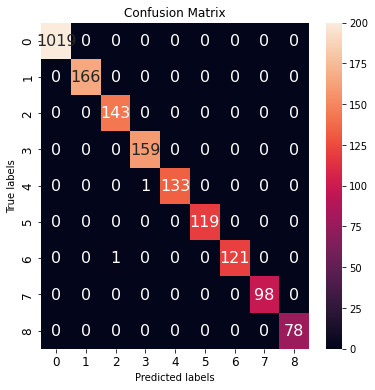

In [67]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, pred_RF),annot=True,vmin=0,vmax=200,fmt='g', ax = ax,annot_kws={"size": 16})
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12); 
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12);

In [68]:
## Classification Report
y,levels = pd.factorize(df3['label'].astype(str))
print(metrics.classification_report(y_test, pred_RF,target_names=levels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1019
           7       1.00      1.00      1.00       166
           3       0.99      1.00      1.00       143
           6       0.99      1.00      1.00       159
           8       1.00      0.99      1.00       134
           4       1.00      1.00      1.00       119
           2       1.00      0.99      1.00       122
           1       1.00      1.00      1.00        98
           5       1.00      1.00      1.00        78

    accuracy                           1.00      2038
   macro avg       1.00      1.00      1.00      2038
weighted avg       1.00      1.00      1.00      2038



In [69]:
# Binarize y test(5,6,7) classes to (1,0,0) - (0,0,1) classes to generate AUC ROC Curves 
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8])
n_classes = y_test_bin.shape[1]

In [77]:
y_test_bin

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [76]:
n_classes

9

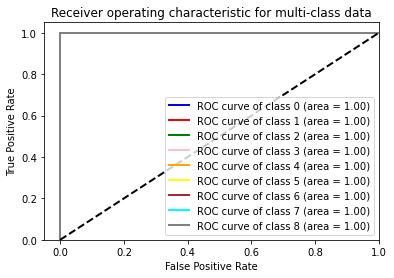

In [78]:
#Generate AUC ROC Curves

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc


# classifier
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators = 80,random_state=22))
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green','pink','orange','yellow','brown','aqua','grey']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [80]:
# Visualize Random Forest Trees
trees = rfcl.estimators_
display(trees)

[DecisionTreeClassifier(max_features='auto', random_state=895331189),
 DecisionTreeClassifier(max_features='auto', random_state=867424388),
 DecisionTreeClassifier(max_features='auto', random_state=2068804396),
 DecisionTreeClassifier(max_features='auto', random_state=990018496),
 DecisionTreeClassifier(max_features='auto', random_state=1806197092),
 DecisionTreeClassifier(max_features='auto', random_state=590468454),
 DecisionTreeClassifier(max_features='auto', random_state=1542674934),
 DecisionTreeClassifier(max_features='auto', random_state=1202737643),
 DecisionTreeClassifier(max_features='auto', random_state=735133268),
 DecisionTreeClassifier(max_features='auto', random_state=1489103752),
 DecisionTreeClassifier(max_features='auto', random_state=1455409631),
 DecisionTreeClassifier(max_features='auto', random_state=1689254372),
 DecisionTreeClassifier(max_features='auto', random_state=1161929693),
 DecisionTreeClassifier(max_features='auto', random_state=1007761042),
 DecisionTr

In [81]:
print("Number of trees is ",len(trees))

Number of trees is  30


In [82]:
print("Number of nodes per tree is ")

i = 0
for tree_in_forest in trees:
    print(tree_in_forest.tree_.node_count)
    i = i + 1

Number of nodes per tree is 
151
59
77
121
137
195
89
177
93
49
169
71
143
195
73
29
39
147
39
157
171
139
65
253
61
83
253
65
97
131


In [84]:
tree_in_forest = trees[1]
tree_in_forest

DecisionTreeClassifier(max_features='auto', random_state=867424388)

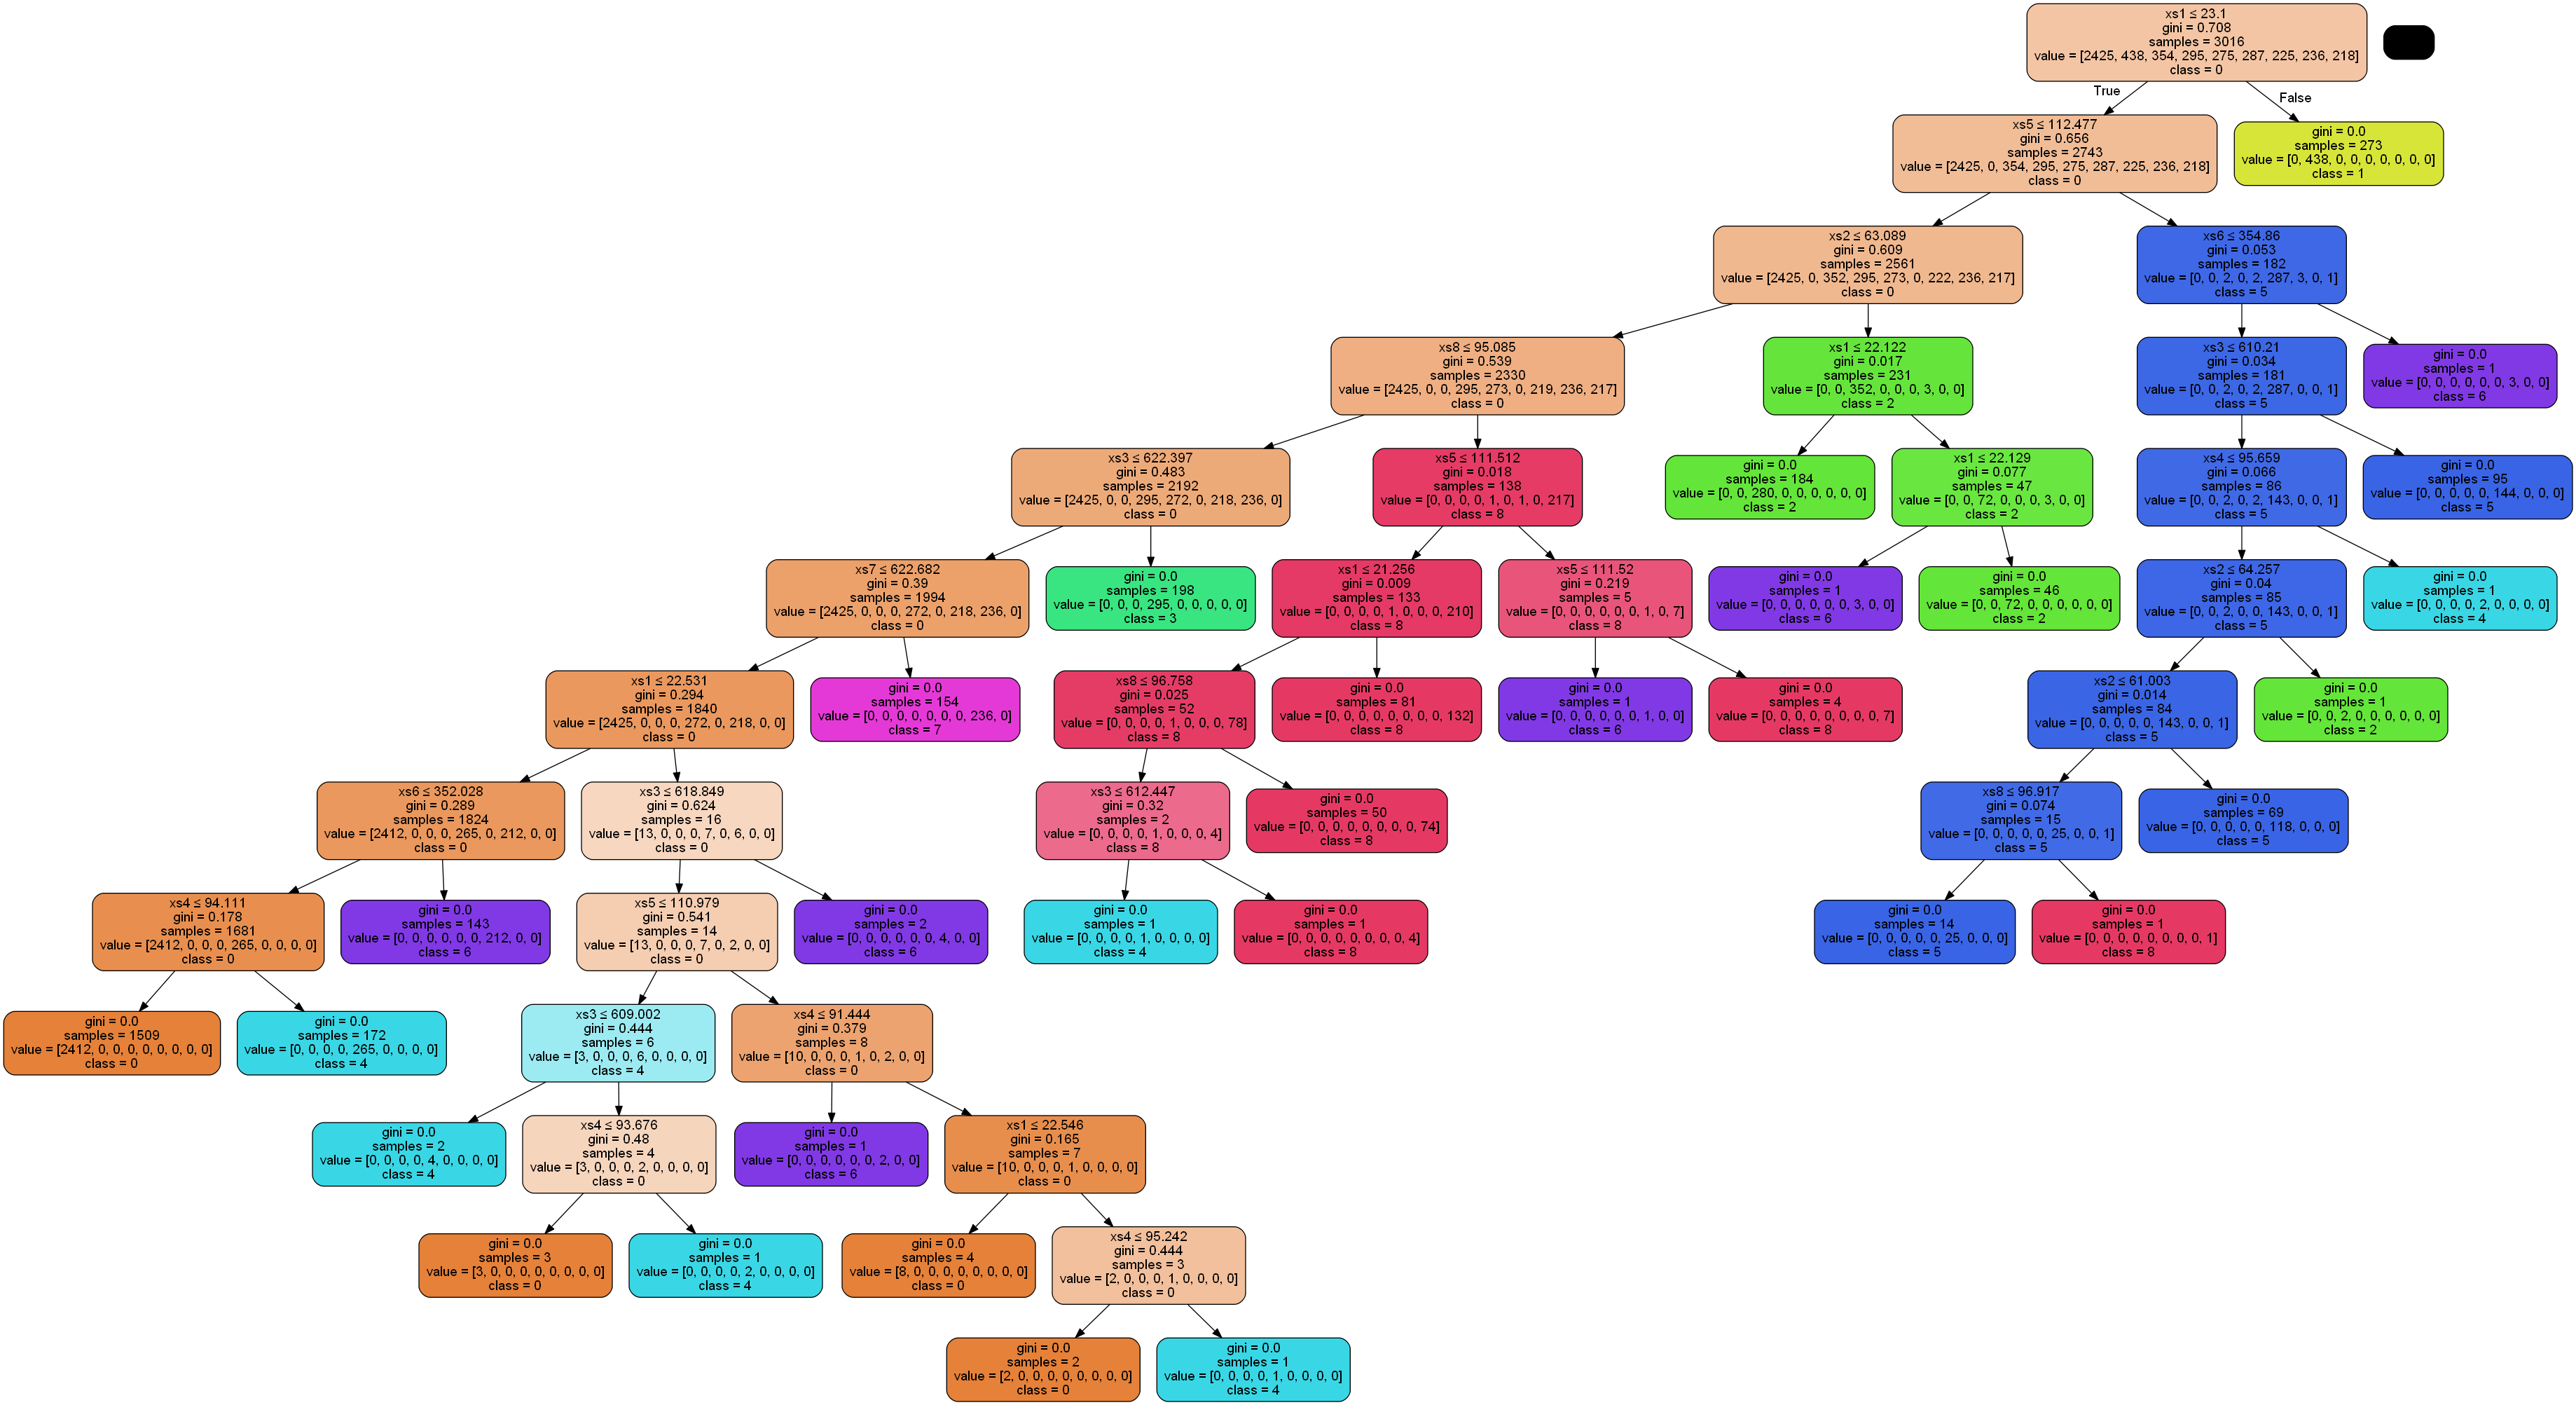

In [85]:
# Plot tree using dot function as before
dot_data = StringIO()
export_graphviz(tree_in_forest, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4','5','6','7','8'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Anomaly_pruned.png')
Image(graph.create_png())

# Apply Bagging Classifier Algorithm and print the accuracy.

In [86]:
# Initiate Bagging Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

# Use different base classifiers; Ex, base_estimator = KNeighborsClassifier()

In [87]:
# Make predictions and calculate accuracy
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)
acc_BG

0.9990186457311089

In [88]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0              Decision Tree  0.999509
1       Pruned Decision Tree  0.960255
2  Grid Search Decision Tree  0.960255
0              Random Forest  0.999019
0                    Bagging  0.999019

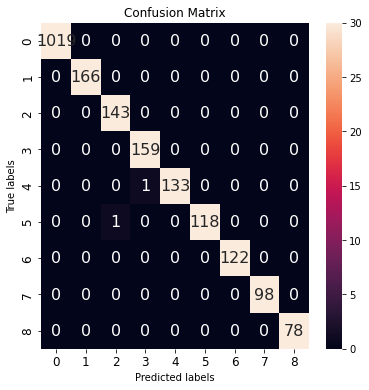

In [89]:
## Confusion Matrix
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, pred_BG),annot=True,vmin=0,vmax=30,fmt='g', ax = ax,annot_kws={"size": 16})
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12); 
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12);

In [90]:
## Classification Report
y,levels = pd.factorize(df3['label'].astype(str))
print(metrics.classification_report(y_test, pred_BG,target_names=levels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1019
           7       1.00      1.00      1.00       166
           3       0.99      1.00      1.00       143
           6       0.99      1.00      1.00       159
           8       1.00      0.99      1.00       134
           4       1.00      0.99      1.00       119
           2       1.00      1.00      1.00       122
           1       1.00      1.00      1.00        98
           5       1.00      1.00      1.00        78

    accuracy                           1.00      2038
   macro avg       1.00      1.00      1.00      2038
weighted avg       1.00      1.00      1.00      2038



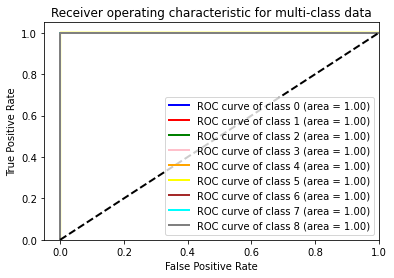

In [91]:
## AUC ROC Curve
# classifier
clf = OneVsRestClassifier(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
#colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

# Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [92]:
# Initiate adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [93]:
# Make predictions and calculate accuracy
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [94]:
acc_AB

0.9975466143277724

In [95]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0              Decision Tree  0.999509
1       Pruned Decision Tree  0.960255
2  Grid Search Decision Tree  0.960255
0              Random Forest  0.999019
0                    Bagging  0.999019
0                   Adaboost  0.997547

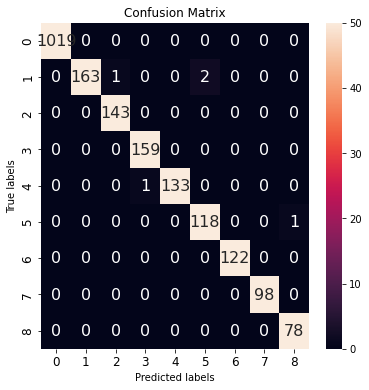

In [96]:
## Confusion Matrix
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, pred_AB),annot=True,vmin=0,vmax=50,fmt='g', ax = ax,annot_kws={"size": 16})
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12); 
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12);

In [97]:
## Classification Report
y,levels = pd.factorize(df['label'].astype(str))
print(metrics.classification_report(y_test, pred_AB,target_names=levels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1019
           6       1.00      0.98      0.99       166
           8       0.99      1.00      1.00       143
           2       0.99      1.00      1.00       159
           4       1.00      0.99      1.00       134
           1       0.98      0.99      0.99       119
           3       1.00      1.00      1.00       122
           7       1.00      1.00      1.00        98
           5       0.99      1.00      0.99        78

    accuracy                           1.00      2038
   macro avg       1.00      1.00      1.00      2038
weighted avg       1.00      1.00      1.00      2038



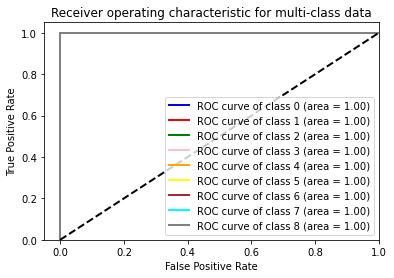

In [98]:
## AUC ROC Curve
# classifier
clf = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
#colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [99]:
# Visualize Adaboost Trees
trees_ab = abcl.estimators_
display(trees_ab)

[DecisionTreeClassifier(max_depth=1, random_state=895331189),
 DecisionTreeClassifier(max_depth=1, random_state=867424388),
 DecisionTreeClassifier(max_depth=1, random_state=2068804396),
 DecisionTreeClassifier(max_depth=1, random_state=990018496),
 DecisionTreeClassifier(max_depth=1, random_state=1806197092),
 DecisionTreeClassifier(max_depth=1, random_state=590468454),
 DecisionTreeClassifier(max_depth=1, random_state=1542674934),
 DecisionTreeClassifier(max_depth=1, random_state=1202737643),
 DecisionTreeClassifier(max_depth=1, random_state=735133268),
 DecisionTreeClassifier(max_depth=1, random_state=1489103752),
 DecisionTreeClassifier(max_depth=1, random_state=1455409631),
 DecisionTreeClassifier(max_depth=1, random_state=1689254372),
 DecisionTreeClassifier(max_depth=1, random_state=1161929693),
 DecisionTreeClassifier(max_depth=1, random_state=1007761042),
 DecisionTreeClassifier(max_depth=1, random_state=820516366),
 DecisionTreeClassifier(max_depth=1, random_state=48947964),


In [100]:
print("Number of trees is ",len(trees_ab))

Number of trees is  100


In [101]:
print("Number of nodes per tree is ")

i = 0
for tree_in_forest in trees_ab:
    print(tree_in_forest.tree_.node_count)
    i = i + 1

Number of nodes per tree is 
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


In [102]:
tree_in_forest_ab = trees_ab[1]

In [103]:
tree_in_forest_ab

DecisionTreeClassifier(max_depth=1, random_state=867424388)

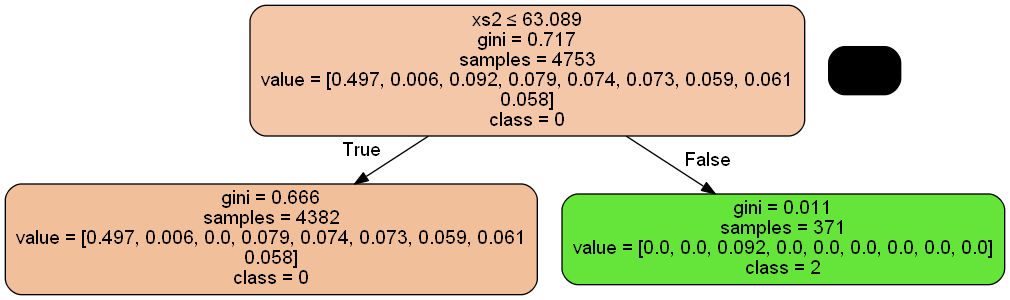

In [104]:
# Plot tree using dot function as before
dot_data = StringIO()
export_graphviz(tree_in_forest_ab, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4','5','6','7','8'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('anomaly_pruned.png')
Image(graph.create_png())

## Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [112]:
# Initiate Gradiant Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 20, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [113]:
# Make predictions and calculate accuracy on test data set
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [114]:
acc_GB

0.9980372914622179

In [108]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0              Decision Tree  0.999509
1       Pruned Decision Tree  0.960255
2  Grid Search Decision Tree  0.960255
0              Random Forest  0.999019
0                    Bagging  0.999019
0                   Adaboost  0.997547
0             Gradient Boost  0.998037

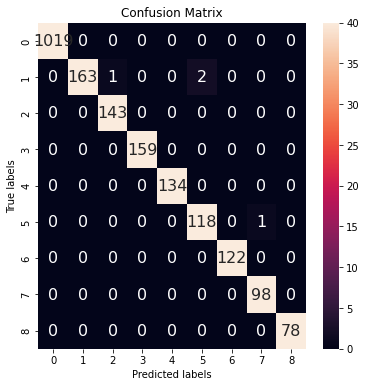

In [109]:
## Confusion Matrix
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, pred_GB),annot=True,vmin=0,vmax=40,fmt='g', ax = ax,annot_kws={"size": 16})
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 


In [110]:
## Classification Report
y,levels = pd.factorize(df3['label'].astype(str))
print(metrics.classification_report(y_test, pred_GB,target_names=levels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1019
           7       1.00      0.98      0.99       166
           3       0.99      1.00      1.00       143
           6       1.00      1.00      1.00       159
           8       1.00      1.00      1.00       134
           4       0.98      0.99      0.99       119
           2       1.00      1.00      1.00       122
           1       0.99      1.00      0.99        98
           5       1.00      1.00      1.00        78

    accuracy                           1.00      2038
   macro avg       1.00      1.00      1.00      2038
weighted avg       1.00      1.00      1.00      2038



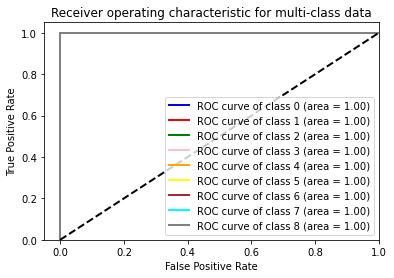

In [111]:
## AUC ROC Curve
clf = OneVsRestClassifier(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
#colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

# Helpful Links

Helpful Links
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

# # Stacking

In [115]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [117]:
# Create Base Learners for Stacking that is Random Forest and GBM
base_learners = [
                 ('model_1', RandomForestClassifier(n_estimators = 50,random_state=22)),
                 ('model_2', GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1,random_state=22))             
                ]

In [119]:
# Initialize Stacking Classifier with the Meta Learner
clf_stack = StackingClassifier(estimators=base_learners, final_estimator=GradientBoostingClassifier(random_state=22))

In [120]:
# Extract score
clf_stack.fit(X_train, y_train)

StackingClassifier(estimators=[('model_1',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=22)),
                               ('model_2',
                                GradientBoostingClassifier(n_estimators=50,
                                                           random_state=22))],
                   final_estimator=GradientBoostingClassifier(random_state=22))

In [121]:
# Making predictions using Staking models
pred_stack = clf_stack.predict(X_test)

In [122]:
# Calculating accuracy on test data set
acc_stack = clf_stack.score(X_test, y_test)

In [123]:
acc_stack

0.9990186457311089

In [124]:
tempResultsDf = pd.DataFrame({'Method':['Stacking RF&GB'], 'accuracy': [acc_stack]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0              Decision Tree  0.999509
1       Pruned Decision Tree  0.960255
2  Grid Search Decision Tree  0.960255
0              Random Forest  0.999019
0                    Bagging  0.999019
0                   Adaboost  0.997547
0             Gradient Boost  0.998037
0             Stacking RF&GB  0.999019

<AxesSubplot:>

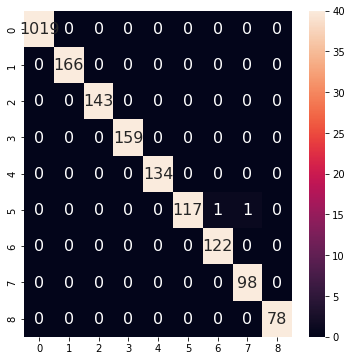

In [125]:
## Confusion Matrix
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, pred_stack),annot=True,vmin=0,vmax=40,fmt='g', ax = ax,annot_kws={"size": 16})

In [126]:
## Classification Report
y,levels = pd.factorize(df3['label'].astype(str))
print(metrics.classification_report(y_test, pred_stack,target_names=levels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1019
           7       1.00      1.00      1.00       166
           3       1.00      1.00      1.00       143
           6       1.00      1.00      1.00       159
           8       1.00      1.00      1.00       134
           4       1.00      0.98      0.99       119
           2       0.99      1.00      1.00       122
           1       0.99      1.00      0.99        98
           5       1.00      1.00      1.00        78

    accuracy                           1.00      2038
   macro avg       1.00      1.00      1.00      2038
weighted avg       1.00      1.00      1.00      2038



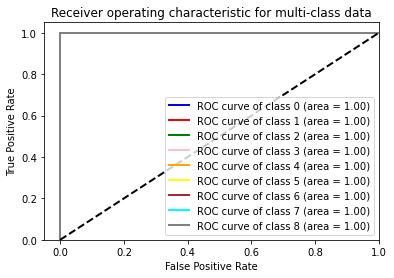

In [127]:
# AUC ROC Curves
# classifier
clf = OneVsRestClassifier(StackingClassifier(estimators=base_learners, final_estimator=GradientBoostingClassifier(random_state=22)))
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
#colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

# GridSearchCV

In [136]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop =80, num =10)]
n_estimators

[10, 17, 25, 33, 41, 48, 56, 64, 72, 80]

In [137]:
# Improving best model using GridSearch CV based on Random Forest from all the models run above
from sklearn.model_selection import GridSearchCV

clf_RF = RandomForestClassifier(random_state=22)
grid_values = {'n_estimators':n_estimators,
               'max_features':['auto','sqrt','log2']
              }
grid_clf_acc_RF = GridSearchCV(clf_RF, param_grid = grid_values)
grid_clf_acc_RF.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc_RF = grid_clf_acc_RF.predict(X_test)
# New Model Evaluation metrics 
print('Evaluation Score : ' + str(grid_clf_acc_RF.score(X_test,y_test)))
print('Best Parameters : ' + str(grid_clf_acc_RF.best_params_))

acc_GS_RF = grid_clf_acc_RF.score(X_test,y_test)
acc_GS_RF

Evaluation Score : 0.9990186457311089
Best Parameters : {'max_features': 'auto', 'n_estimators': 41}


0.9990186457311089

In [133]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest with Grid Search'], 'accuracy': [acc_GS_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0                   Decision Tree  0.999509
1            Pruned Decision Tree  0.960255
2       Grid Search Decision Tree  0.960255
0                   Random Forest  0.999019
0                         Bagging  0.999019
0                        Adaboost  0.997547
0                  Gradient Boost  0.998037
0                  Stacking RF&GB  0.999019
0  Random Forest with Grid Search  0.999019

In [134]:
# Feature Importance
feat_importance = rfcl.feature_importances_
feat_imp_dict = dict(zip(feature_cols, rfcl.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

0
xs1  0.164745
xs2  0.153635
xs3  0.131234
xs4  0.127337
xs5  0.119192
xs7  0.104826
xs6  0.099529
xs8  0.099502

# Model Interpretation using Lime

In [138]:
import lime
import lime.lime_tabular

In [139]:
df3.drop('label',axis=1).columns

Index(['xs1', 'xs2', 'xs3', 'xs4', 'xs5', 'xs6', 'xs7', 'xs8'], dtype='object')

In [140]:
# Using Grid Search algo for model interpretation as it turned out to be best algorithm
# clf_stack
# grid_clf_acc_RF
predict_fn_rf = lambda x: grid_clf_acc_RF.predict_proba(x).astype(float)
X = X_train.values

In [141]:
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = df3.drop('label',axis=1).columns,
                                                   class_names=['0','1','2','3','4','5','6','7','8'],kernel_width=5)

In [142]:
X_test.iloc[105]

xs1     25.834279
xs2     62.531997
xs3    606.326659
xs4     93.466773
xs5    111.394152
xs6    350.529444
xs7    618.695191
xs8     92.818854
Name: 3097, dtype: float64

In [ ]:
#22.134947	60.786604	609.142675	92.696432	111.526181	336.322046	603.92307	92.107053	2

In [143]:
y_test.values[105]

1

In [144]:
# Explain which features are leading to which class prediction
choosen_instance = X_test.values[105]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=8,labels=[0,1,2,3,4,5,6,7,8])
exp.show_in_notebook(show_all=True)

In [145]:
y_test.values[110]

5

In [146]:
choosen_instance = X_test.values[110]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10,labels=[0,1,2,3,4,5,6,7,8])
exp.show_in_notebook(show_all=False)

In [147]:
y_test.values[14]

4

In [148]:
choosen_instance = X_test.values[14]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=8,labels=[0,1,2,3,4,5,6,7,8])
exp.show_in_notebook(show_all=True)

Lime Explaination
https://arxiv.org/pdf/1602.04938.pdf